In [1]:
!pip install mlxtend

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 6.7 MB/s eta 0:00:006.7 MB/s eta 0:00:01

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import pandas as pd
df = pd.read_csv("Titanic.csv")

In [3]:
df.head()

,Class,Gender,Age,Survived
0,3rd,Male,Child,No
1,3rd,Male,Child,No
2,3rd,Male,Child,No
3,3rd,Male,Child,No
4,3rd,Male,Child,No


In [4]:
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [9]:
df1 = pd.get_dummies(df)
df1.head()

,Class_1st,Class_2nd,Class_3rd,Class_Crew,Gender_Female,Gender_Male,Age_Adult,Age_Child,Survived_No,Survived_Yes
0,False,False,True,False,False,True,False,True,True,False
1,False,False,True,False,False,True,False,True,True,False
2,False,False,True,False,False,True,False,True,True,False
3,False,False,True,False,False,True,False,True,True,False
4,False,False,True,False,False,True,False,True,True,False


In [15]:
df1 = df1.astype(int)
df1.head()

,Class_1st,Class_2nd,Class_3rd,Class_Crew,Gender_Female,Gender_Male,Age_Adult,Age_Child,Survived_No,Survived_Yes
0,0,0,1,0,0,1,0,1,1,0
1,0,0,1,0,0,1,0,1,1,0
2,0,0,1,0,0,1,0,1,1,0
3,0,0,1,0,0,1,0,1,1,0
4,0,0,1,0,0,1,0,1,1,0


In [18]:
# Apriori Algorithm

frequentitemsets = apriori(df1, min_support = 0.6, use_colnames=True)
frequentitemsets

/home/animesh23/Desktop/UbuntuVM_BE/UbuntuVM/animesh_be/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.786461,(Gender_Male)
1,0.950477,(Age_Adult)
2,0.676965,(Survived_No)
3,0.757383,"(Age_Adult, Gender_Male)"
4,0.619718,"(Survived_No, Gender_Male)"
5,0.653339,"(Survived_No, Age_Adult)"
6,0.603816,"(Survived_No, Age_Adult, Gender_Male)"


In [28]:
rules = association_rules(frequentitemsets,metric = 'lift',min_threshold=1)
rules
rules1 = rules.sort_values('lift', ascending=False)
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
8,"(Age_Adult, Gender_Male)",(Survived_No),0.757383,0.676965,0.603816,0.797241,1.177669,0.091095,1.593193,0.621823
9,(Survived_No),"(Age_Adult, Gender_Male)",0.676965,0.757383,0.603816,0.891946,1.177669,0.091095,2.245337,0.467023
6,"(Survived_No, Age_Adult)",(Gender_Male),0.653339,0.786461,0.603816,0.924200,1.175139,0.089991,2.817152,0.429921
11,(Gender_Male),"(Survived_No, Age_Adult)",0.786461,0.653339,0.603816,0.767764,1.175139,0.089991,1.492710,0.697935
2,(Survived_No),(Gender_Male),0.676965,0.786461,0.619718,0.915436,1.163995,0.087312,2.525187,0.436144
3,(Gender_Male),(Survived_No),0.786461,0.676965,0.619718,0.787984,1.163995,0.087312,1.523634,0.659783
7,"(Survived_No, Gender_Male)",(Age_Adult),0.619718,0.950477,0.603816,0.974340,1.025106,0.014788,1.929980,0.064404
10,(Age_Adult),"(Survived_No, Gender_Male)",0.950477,0.619718,0.603816,0.635277,1.025106,0.014788,1.042660,0.494550
4,(Survived_No),(Age_Adult),0.676965,0.950477,0.653339,0.965101,1.015386,0.009900,1.419023,0.046906
5,(Age_Adult),(Survived_No),0.950477,0.676965,0.653339,0.687380,1.015386,0.009900,1.033317,0.305968


In [31]:
rules1.iloc[0:10,:][rules1.lift>1]

/tmp/ipykernel_34261/3004288325.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rules1.iloc[0:10,:][rules1.lift>1]


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
8,"(Age_Adult, Gender_Male)",(Survived_No),0.757383,0.676965,0.603816,0.797241,1.177669,0.091095,1.593193,0.621823
9,(Survived_No),"(Age_Adult, Gender_Male)",0.676965,0.757383,0.603816,0.891946,1.177669,0.091095,2.245337,0.467023
6,"(Survived_No, Age_Adult)",(Gender_Male),0.653339,0.786461,0.603816,0.924200,1.175139,0.089991,2.817152,0.429921
11,(Gender_Male),"(Survived_No, Age_Adult)",0.786461,0.653339,0.603816,0.767764,1.175139,0.089991,1.492710,0.697935
2,(Survived_No),(Gender_Male),0.676965,0.786461,0.619718,0.915436,1.163995,0.087312,2.525187,0.436144
3,(Gender_Male),(Survived_No),0.786461,0.676965,0.619718,0.787984,1.163995,0.087312,1.523634,0.659783
7,"(Survived_No, Gender_Male)",(Age_Adult),0.619718,0.950477,0.603816,0.974340,1.025106,0.014788,1.929980,0.064404
10,(Age_Adult),"(Survived_No, Gender_Male)",0.950477,0.619718,0.603816,0.635277,1.025106,0.014788,1.042660,0.494550
4,(Survived_No),(Age_Adult),0.676965,0.950477,0.653339,0.965101,1.015386,0.009900,1.419023,0.046906
5,(Age_Adult),(Survived_No),0.950477,0.676965,0.653339,0.687380,1.015386,0.009900,1.033317,0.305968


array([[<Axes: title={'center': 'support'}>,
        <Axes: title={'center': 'confidence'}>]], dtype=object)

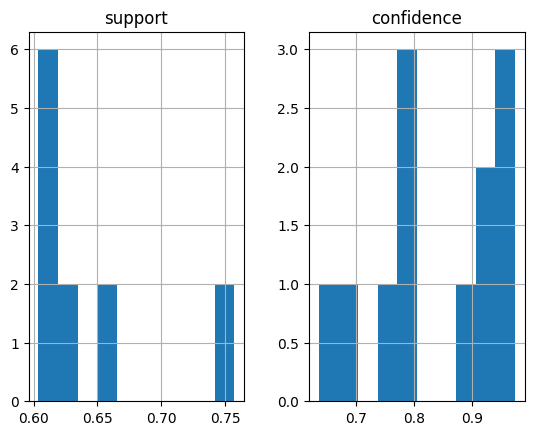

In [32]:
rules1[['support','confidence']].hist()

In [37]:
rules1.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
8,"(Age_Adult, Gender_Male)",(Survived_No),0.757383,0.676965,0.603816,0.797241,1.177669,0.091095,1.593193,0.621823
9,(Survived_No),"(Age_Adult, Gender_Male)",0.676965,0.757383,0.603816,0.891946,1.177669,0.091095,2.245337,0.467023
6,"(Survived_No, Age_Adult)",(Gender_Male),0.653339,0.786461,0.603816,0.924200,1.175139,0.089991,2.817152,0.429921
11,(Gender_Male),"(Survived_No, Age_Adult)",0.786461,0.653339,0.603816,0.767764,1.175139,0.089991,1.492710,0.697935
2,(Survived_No),(Gender_Male),0.676965,0.786461,0.619718,0.915436,1.163995,0.087312,2.525187,0.436144


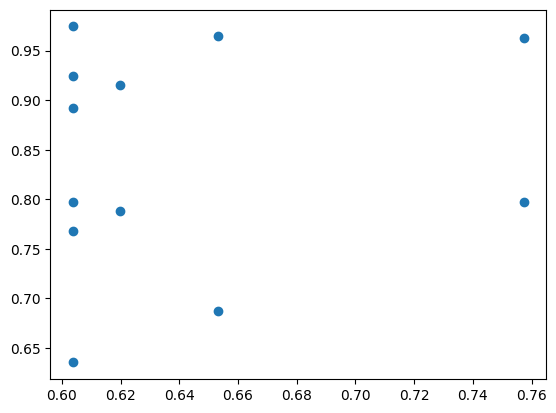

In [38]:
import matplotlib.pyplot as plt

#x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
#y = [99,86,87,88,111,86,103,87,94,78,77,85,86]

plt.scatter(rules1['support'], rules1['confidence'])
plt.show()

In [43]:
import seaborn as sns
sns.scatterplot(rules1.support, rules1.confidence)
plt.show()

TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 were given